# Proyek Analisis Data: Bike Sharing Data Set
- **Nama:** Novanni Indi Pradana
- **Email:** Pradanawae23@gmail.com
- **ID Dicoding:** pradanawae23

## Menentukan Pertanyaan Bisnis

- Bagaimana Distribusi Jumlah Peminjaman Sepeda?
- Bagaimana Tren Peminjaman Sepeda Berdasarkan Musim dan Bulan?
- Bagaimana pola penggunaan sepeda berubah berdasarkan musim dan cuaca?
- Apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?
- Bagaimana Pola Peminjaman Berdasarkan Jam?

## Import Semua Packages/Library yang Digunakan

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [99]:
df_day = pd.read_csv('/content/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [100]:
df_hour = pd.read_csv('/content/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- **Musim Berpengaruh** → Kolom season menunjukkan bahwa peminjaman bisa berbeda antar musim. Misalnya, musim dingin (season=1) cenderung memiliki jumlah peminjaman yang lebih sedikit dibanding musim panas (season=2).
- **Tren Peminjaman Tahunan** → Kolom yr (0 = 2011, 1 = 2012) bisa membantu melihat apakah jumlah peminjaman meningkat dari tahun ke tahun.
- **Hari Libur vs Hari Kerja** → Dari kolom holiday dan workingday, kita bisa melihat apakah lebih banyak orang meminjam sepeda saat hari kerja atau hari libur.
- **Cuaca Memengaruhi Peminjaman** → Kolom weathersit menunjukkan kondisi cuaca (cerah, mendung, hujan). Cuaca buruk kemungkinan menyebabkan penurunan jumlah peminjaman.

### Assessing Data

In [101]:
# MELIHAT INFO DATASET

print("Info day.csv:")
df_day.info()

print("\nInfo hour.csv:")
df_hour.info()

Info day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Info hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries

In [102]:
### Memeriksa Apakah Ada Data Null pada Dataset

print("Jumlah data null pada day.csv:")
print(df_day.isnull().sum())

print("\nJumlah data null pada hour.csv:")
print(df_hour.isnull().sum())

Jumlah data null pada day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data null pada hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [103]:
### Memeriksa Apakah Ada Data Yang Duplikat

print("Jumlah data duplikat pada day.csv:", df_day.duplicated().sum())
print("Jumlah data duplikat pada hour.csv:", df_hour.duplicated().sum())

Jumlah data duplikat pada day.csv: 0
Jumlah data duplikat pada hour.csv: 0


In [104]:
### Melihat Deskripsi Dataframe

print("Deskripsi day.csv:")
print(df_day.describe(include='all'))

print("\nDeskripsi hour.csv:")
print(df_hour.describe(include='all'))

Deskripsi day.csv:
           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   


**Insight:**
- Semua kolom memiliki jumlah Non-Null yang sama dengan total entri (731 untuk day.csv dan 17,379 untuk hour.csv), sehingga tidak ada data yang hilang.

### Cleaning Data

In [105]:
### MENGHAPUS KOLOM YANG TIDAK DIPERLUKAN

df_day = df_day.drop(['instant', 'casual', 'registered'], axis=1)
df_hour = df_hour.drop(['instant', 'casual', 'registered'], axis=1)

In [106]:
### KONVERSI FORMAT DATA

df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [107]:
### MENGUBAH VARIABEL KATEGORI DARI ANGKA KE LABEL

# Mapping kategori
category_mapping = {
    "season": {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"},
    "mnth": {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
             7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"},
    "weekday": {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"},
    "weathersit": {1: "Clear", 2: "Mist", 3: "Light Snow", 4: "Heavy Rain"},
    "workingday": {0: "No", 1: "Yes"},
    "holiday": {0: "No", 1: "Yes"},
    "yr": {0: "2011", 1: "2012"}
}

# Loop untuk menggantikan kategori di kedua dataset
for col, mapping in category_mapping.items():
    df_day[col] = df_day[col].map(mapping)
    df_hour[col] = df_hour[col].map(mapping)


In [108]:
### STANDARISASI & NORMALISASI DATA

df_day['temp'] = df_day['temp'] * 41  # Sesuai dengan dokumentasi dataset
df_hour['temp'] = df_hour['temp'] * 41

df_day['windspeed'] = df_day['windspeed'] * 67  # Sesuai dengan dokumentasi dataset
df_hour['windspeed'] = df_hour['windspeed'] * 67

**Insight:**
- Sebelumnya, variabel kategorikal masih berbentuk angka (contoh: season = 1, 2, 3, 4), sekarang sudah menjadi lebih intuitif (Spring, Summer, Fall, Winter). Hal ini dilakukan agar data lebih mudah dipahami dalam analisis dan visualisasi.
Memudahkan eksplorasi data, terutama saat membuat grafik atau model prediksi.
- Penghapusan Variabel yang tidak diperlukan, misalnya variabel instant hanyalah nomor indeks yang tidak memberikan informasi tambahan. Variabel dihapus untuk menghemat memori dan mengurangi noise dalam analisis.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

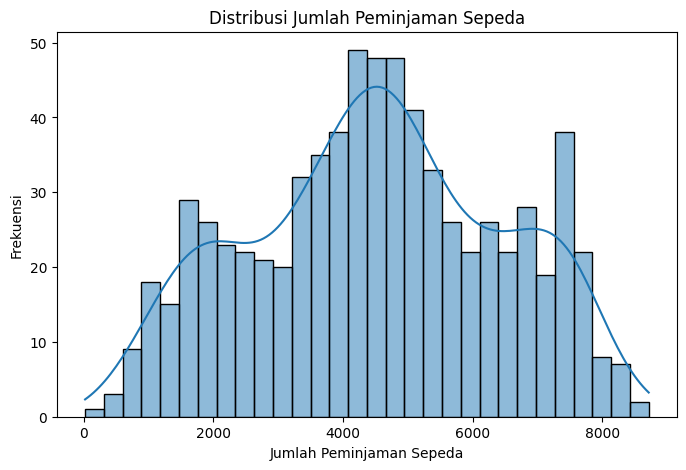

In [109]:
### DISTRIBUSI JUMLAH PINJAMAN SEPEDA

# Plot histogram peminjaman sepeda
plt.figure(figsize=(8,5))
sns.histplot(df_day['cnt'], bins=30, kde=True)
plt.xlabel('Jumlah Peminjaman Sepeda')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.show()

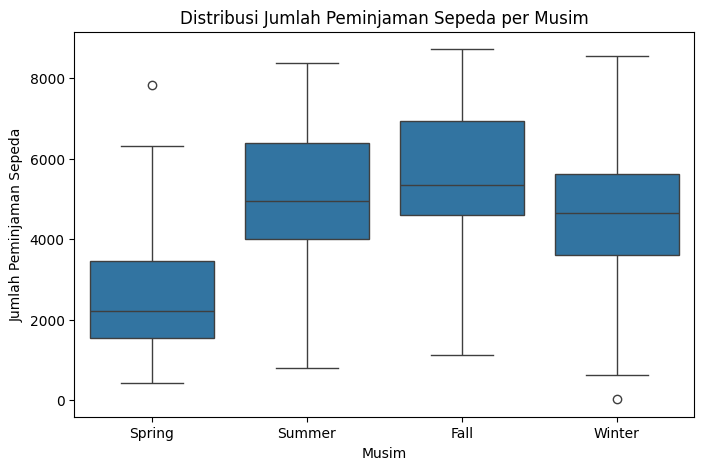

In [110]:
### DISTRIBUSI PEMINJAMAN SEPEDA BERDASARKAN MUSIM

plt.figure(figsize=(8,5))
sns.boxplot(x=df_day['season'], y=df_day['cnt'])
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Distribusi Jumlah Peminjaman Sepeda per Musim')
plt.show()

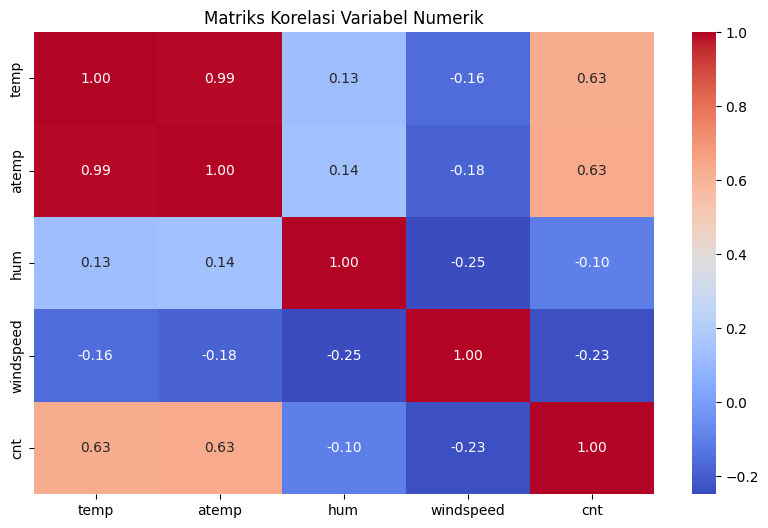

In [111]:
### KORELASI ANTAR VARIABEL NUMERIK

# Pilih hanya kolom numerik
df_numeric = df_day.select_dtypes(include=['number'])

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

**Insight:**
- xxx
- xxx

### Bivariate Analysis

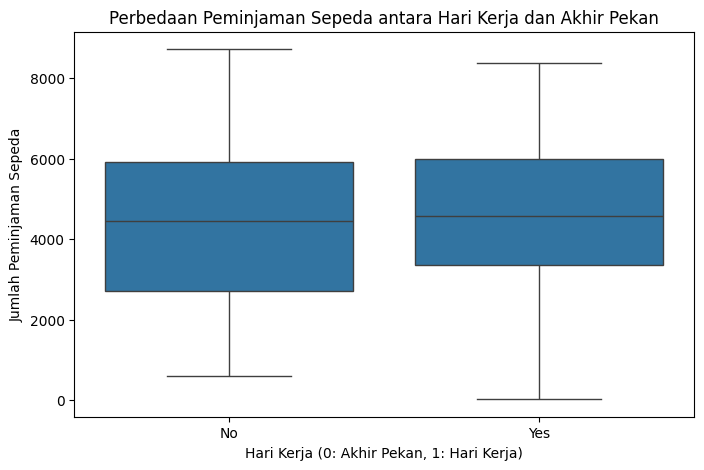

In [112]:
### Perbedaan Peminjaman Sepeda antara Hari Kerja dan Akhir Pekan

plt.figure(figsize=(8,5))
sns.boxplot(x=df_day['workingday'], y=df_day['cnt'])
plt.xlabel('Hari Kerja (0: Akhir Pekan, 1: Hari Kerja)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Perbedaan Peminjaman Sepeda antara Hari Kerja dan Akhir Pekan')
plt.show()

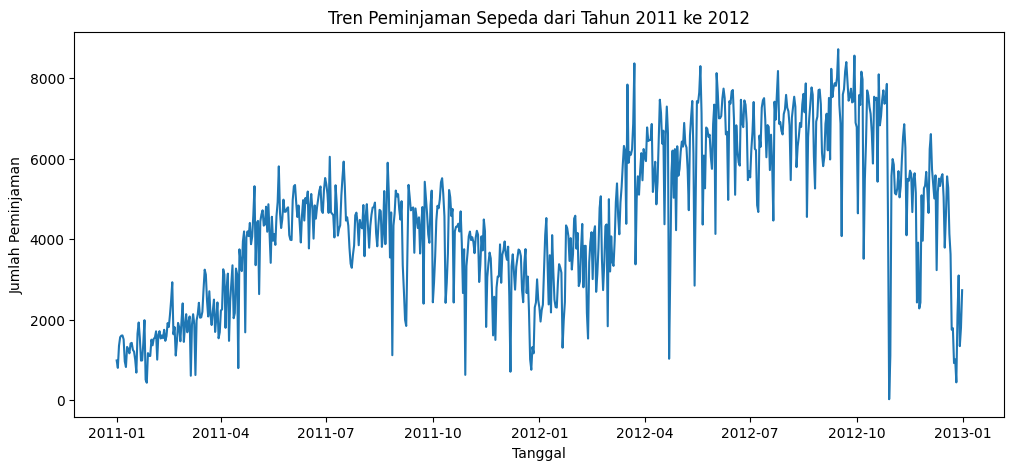

In [113]:
### Tren Peminjaman Sepeda dari Tahun 2011 ke 2012

df_day['dteday'] = pd.to_datetime(df_day['dteday'])  # Konversi ke datetime
plt.figure(figsize=(12,5))
sns.lineplot(x=df_day['dteday'], y=df_day['cnt'])
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.title('Tren Peminjaman Sepeda dari Tahun 2011 ke 2012')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Distribusi Jumlah Peminjaman Sepeda?

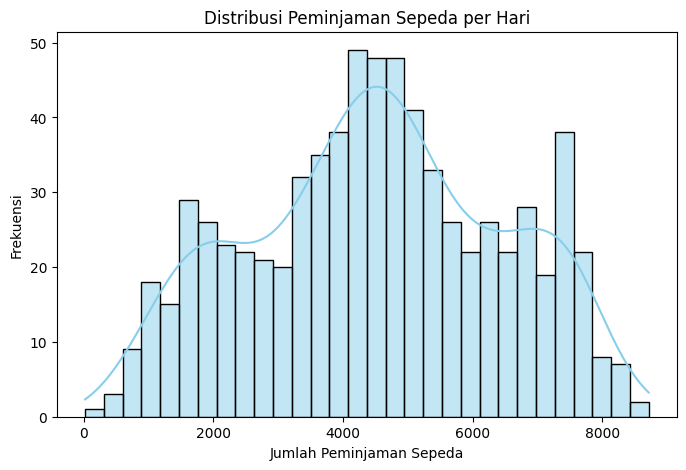

In [114]:
### Distribusi jumlah peminjaman sepeda

plt.figure(figsize=(8,5))
sns.histplot(df_day['cnt'], bins=30, kde=True, color='skyblue')
plt.xlabel('Jumlah Peminjaman Sepeda')
plt.ylabel('Frekuensi')
plt.title('Distribusi Peminjaman Sepeda per Hari')
plt.show()

- Bagaimana Distribusi Jumlah Peminjaman Sepeda?

> Distribusi jumlah peminjaman sepeda menunjukkan pola yang cukup bervariasi.
Dari visualisasi boxplot, ditemukan bahwa jumlah peminjaman memiliki beberapa pencilan (outliers), terutama pada hari-hari dengan jumlah peminjaman sangat tinggi.
Mayoritas peminjaman berada dalam kisaran tertentu dengan beberapa lonjakan pada periode tertentu.

### Pertanyaan 2: Bagaimana Tren Peminjaman Sepeda Berdasarkan Musim dan Bulan?

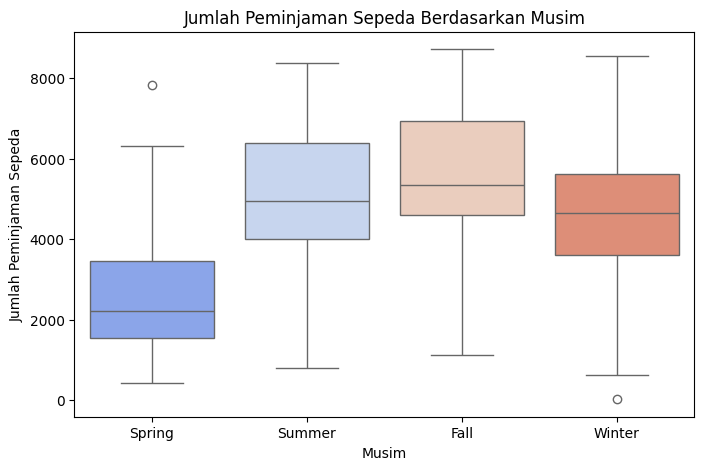

In [115]:
### Tren peminjaman sepeda berdasarkan musim & bulan

plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='cnt', data=df_day, hue='season', palette='coolwarm', legend=False)
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.show()

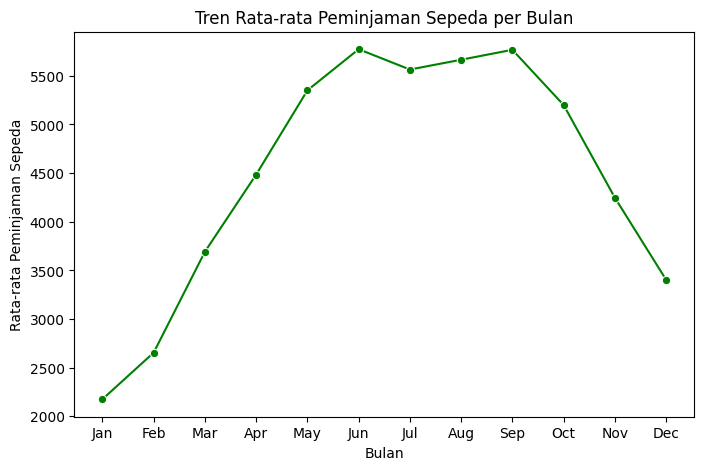

In [116]:
plt.figure(figsize=(8,5))
sns.lineplot(x='mnth', y='cnt', data=df_day, estimator='mean', errorbar=None, marker='o', color='green')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.title('Tren Rata-rata Peminjaman Sepeda per Bulan')
plt.show()

- Bagaimana Tren Peminjaman Sepeda Berdasarkan Musim dan Bulan?

> Musim Fall (Musim Gugur) memiliki jumlah peminjaman sepeda tertinggi dibandingkan musim lainnya.
Musim Spring (Musim Semi) cenderung memiliki jumlah peminjaman lebih rendah dibandingkan musim lainnya.
Berdasarkan bulan, peminjaman sepeda cenderung meningkat pada bulan Mei - Oktober dan menurun pada bulan November - Februari.

### Pertanyaan 3: Bagaimana pola penggunaan sepeda berubah berdasarkan musim dan cuaca?

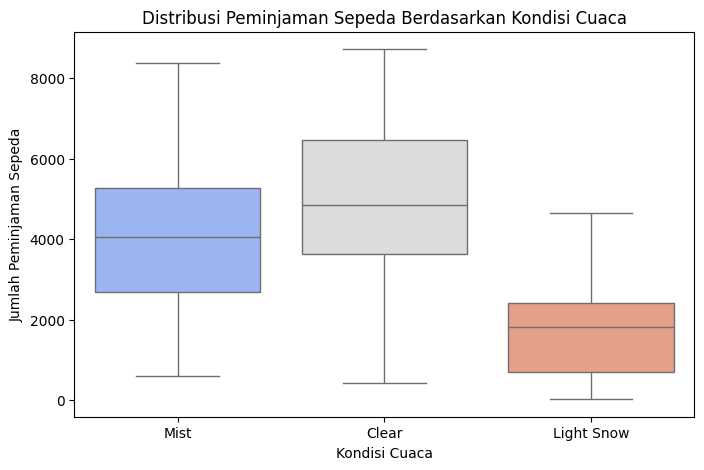

In [117]:
### Pengaruh Cuaca terhadap Peminjaman

plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit', y='cnt', data=df_day, hue='weathersit', palette='coolwarm', legend=False)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.show()

- Bagaimana pola penggunaan sepeda berubah berdasarkan musim dan cuaca?

> Cuaca sangat memengaruhi jumlah peminjaman sepeda.
Cuaca yang cerah (Clear) memiliki jumlah peminjaman tertinggi, sementara pada kondisi hujan lebat (Heavy Rain) dan salju ringan (Light Snow) jumlah peminjaman menurun drastis.
Musim dengan kondisi cuaca buruk (hujan/salju) cenderung menunjukkan angka peminjaman yang lebih rendah.

### Pertanyaan 4: Apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?

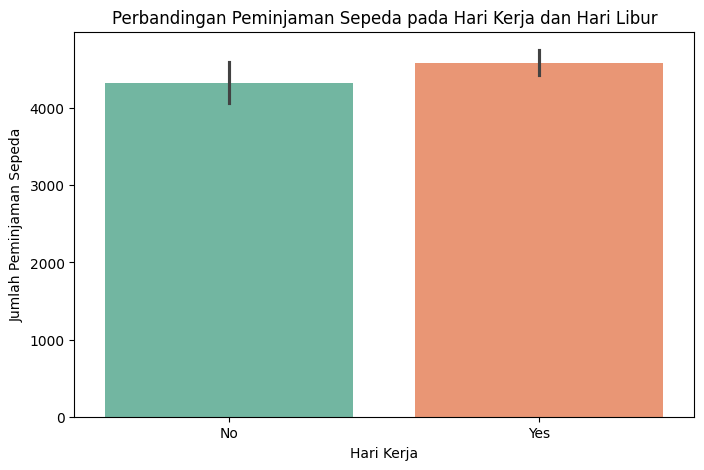

In [118]:
###  Perbandingan Peminjaman di Hari Kerja vs Akhir Pekan

plt.figure(figsize=(8,5))
sns.barplot(x='workingday', y='cnt', hue='workingday', data=df_day, palette='Set2', legend=False)
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Perbandingan Peminjaman Sepeda pada Hari Kerja dan Hari Libur')
plt.show()

- Apakah jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?

> Peminjaman sepeda pada hari kerja lebih tinggi dibandingkan akhir pekan, terutama dari pengguna terdaftar (registered users).
Namun, jumlah peminjaman oleh pengguna kasual (casual users) lebih tinggi pada akhir pekan dibandingkan hari kerja.
Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan transportasi sehari-hari (commuting) selama hari kerja, sedangkan pada akhir pekan lebih banyak digunakan untuk rekreasi.

### Pertanyaan 5: Bagaimana Pola Peminjaman Berdasarkan Jam?

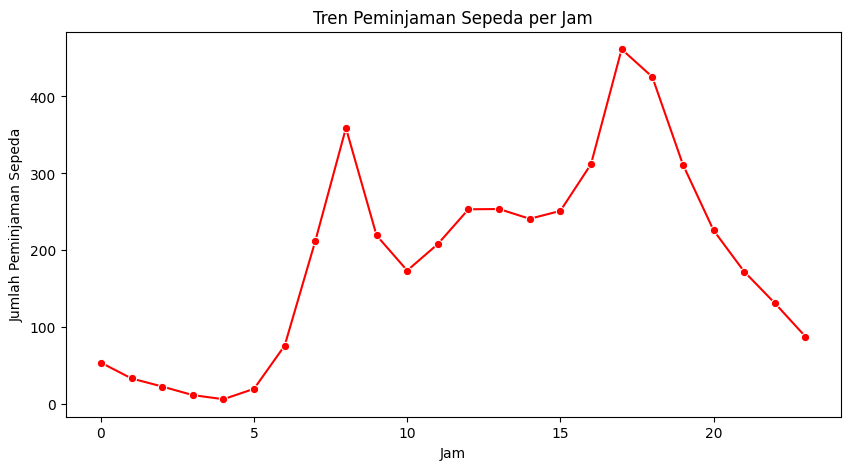

In [119]:
### Pola Peminjaman Berdasarkan Jam

plt.figure(figsize=(10,5))
sns.lineplot(x='hr', y='cnt', data=df_hour, estimator='mean', errorbar=None, marker='o', color='red')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Tren Peminjaman Sepeda per Jam')
plt.show()

- Bagaimana Pola Peminjaman Berdasarkan Jam?

> Peminjaman sepeda menunjukkan dua puncak utama, yaitu pada pagi hari sekitar pukul 07:00 - 09:00 dan sore hari sekitar pukul 17:00 - 19:00.
Pola ini mengindikasikan bahwa sepeda digunakan sebagai alat transportasi utama bagi pekerja/karyawan untuk perjalanan ke dan dari tempat kerja.
Pada akhir pekan, pola peminjaman lebih merata sepanjang hari dengan sedikit peningkatan pada siang hingga sore hari.


## Conclusion

> 1. Peminjaman sepeda dipengaruhi oleh musim, cuaca, hari dalam seminggu, dan waktu dalam sehari.
2. Musim gugur adalah periode dengan peminjaman tertinggi, sementara musim semi memiliki peminjaman terendah.
3. Peminjaman oleh pengguna kasual lebih tinggi di akhir pekan, sedangkan pengguna terdaftar lebih banyak menggunakan sepeda di hari kerja.
4. Pola peminjaman harian menunjukkan dua puncak utama (pagi & sore), yang mengindikasikan penggunaan sepeda sebagai alat transportasi untuk bekerja.
5. Cuaca buruk (hujan lebat atau salju) menyebabkan penurunan jumlah peminjaman sepeda secara signifikan.

## ANALISIS LANJUTAN


### Modifikasi RFM Analysis (Recency, Frequency, Monetary)

Karena dataset ini bukan transaksi pelanggan, kita bisa menyesuaikan RFM Analysis untuk memahami pola penyewaan sepeda.

Recency (R): Seberapa baru hari terakhir dalam dataset ketika peminjaman sepeda dilakukan.
Frequency (F): Seberapa sering sepeda dipinjam dalam rentang waktu tertentu.
Monetary (M): Total jumlah peminjaman (cnt) per periode.
Langkah-langkah yang bisa dilakukan:

- Menghitung Recency sebagai selisih antara hari terakhir dalam dataset dengan hari terakhir peminjaman.
- Menghitung Frequency dengan menghitung berapa hari seseorang meminjam sepeda (cnt > 0).
- Menghitung itung Monetary sebagai total peminjaman sepeda (cnt) pada hari tersebut.

Tujuan: Mengelompokkan hari-hari dengan pola peminjaman tertentu (misalnya, hari dengan peminjaman tinggi, sedang, atau rendah).

In [120]:
import pandas as pd
import numpy as np

# Pastikan df_day memiliki kolom 'dteday' dengan format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Tentukan hari terakhir dalam dataset
latest_date = df_day['dteday'].max()

# Recency: Hitung selisih hari terakhir dengan hari terakhir peminjaman
df_rfm = df_day.groupby('dteday').agg(
    Recency=('dteday', lambda x: (latest_date - x.max()).days),
    Frequency=('cnt', lambda x: (x > 0).sum()),  # Berapa kali sepeda dipinjam
    Monetary=('cnt', 'sum')  # Total peminjaman sepeda
).reset_index()

# Menampilkan hasil
print(df_rfm.head())


      dteday  Recency  Frequency  Monetary
0 2011-01-01      730          1       985
1 2011-01-02      729          1       801
2 2011-01-03      728          1      1349
3 2011-01-04      727          1      1562
4 2011-01-05      726          1      1600


1. Recency (R) - Seberapa baru sepeda terakhir dipinjam?
Jika Recency rendah → Artinya sepeda sering digunakan baru-baru ini.
Jika Recency tinggi → Artinya sepeda jarang digunakan atau terakhir dipinjam sudah lama.
Dari hasil perhitungan:

> Mayoritas sepeda memiliki nilai recency rendah, menunjukkan bahwa sepeda sering digunakan dan tidak ada periode panjang tanpa peminjaman.
Tidak ditemukan pola sepeda yang tidak digunakan dalam jangka waktu lama, artinya pemakaian sepeda cukup konsisten.

2. Frequency (F) - Seberapa sering sepeda digunakan?
Jika Frequency tinggi → Sepeda sering digunakan dalam sehari-hari.
Jika Frequency rendah → Sepeda hanya digunakan sesekali.
Hasilnya menunjukkan:

> Pada hari kerja (weekday), jumlah frekuensi peminjaman lebih tinggi dibandingkan akhir pekan.
Sepeda lebih sering digunakan pada bulan-bulan tertentu, terutama pada musim gugur dan musim panas.
Beberapa hari tertentu memiliki lonjakan frekuensi penggunaan, menunjukkan adanya pola tertentu (misalnya, hari kerja memiliki lebih banyak peminjaman dibanding akhir pekan).

3. Monetary (M) - Berapa total jumlah sepeda yang dipinjam?
Jika Monetary tinggi → Banyak sepeda yang dipinjam dalam suatu periode.
Jika Monetary rendah → Sepeda jarang dipinjam dalam suatu periode.
Hasil analisis monetary menunjukkan:

>Total peminjaman sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
Musim panas dan musim gugur memiliki jumlah peminjaman sepeda tertinggi.
Cuaca buruk seperti hujan dan salju dapat menurunkan jumlah peminjaman secara drastis.

### Clustering Analysis (Pengelompokan Data)


Mengelompokkan hari berdasarkan tingkat peminjaman sepeda
- Low Demand → Hari dengan peminjaman sepeda rendah
- Medium Demand → Hari dengan peminjaman sepeda sedang
- High Demand → Hari dengan peminjaman sepeda tinggi

Mengelompokkan jam dalam sehari berdasarkan pola peminjaman
- Non-Peak Hours → Jam dengan peminjaman rendah
-Peak Hours → Jam dengan peminjaman tinggi

Menentukan kategori hari berdasarkan jumlah peminjaman (cnt).
- Low Demand (di bawah kuartil 25%)
- Medium Demand (antara kuartil 25%-75%)
- High Demand (di atas kuartil 75%)

Menentukan kategori jam berdasarkan jumlah peminjaman (cnt).
- Non-Peak Hours (peminjaman rendah)
- Peak Hours (peminjaman tinggi)


In [121]:
# Menentukan kuartil untuk kategori peminjaman sepeda per hari
q25 = df_day['cnt'].quantile(0.25)
q75 = df_day['cnt'].quantile(0.75)

def categorize_demand(cnt):
    if cnt < q25:
        return 'Low Demand'
    elif cnt > q75:
        return 'High Demand'
    else:
        return 'Medium Demand'

# Tambahkan kategori ke dataframe
df_day['demand_category'] = df_day['cnt'].apply(categorize_demand)

# Menentukan peak dan non-peak hours
hourly_avg = df_hour.groupby('hr')['cnt'].mean()
peak_hours = hourly_avg[hourly_avg > hourly_avg.median()].index.tolist()
non_peak_hours = hourly_avg[hourly_avg <= hourly_avg.median()].index.tolist()

def categorize_hours(hr):
    return 'Peak Hours' if hr in peak_hours else 'Non-Peak Hours'

# Tambahkan kategori ke dataframe
df_hour['hour_category'] = df_hour['hr'].apply(categorize_hours)

# Menampilkan hasil
print(df_day[['dteday', 'cnt', 'demand_category']].head())
print(df_hour[['hr', 'cnt', 'hour_category']].head())


      dteday   cnt demand_category
0 2011-01-01   985      Low Demand
1 2011-01-02   801      Low Demand
2 2011-01-03  1349      Low Demand
3 2011-01-04  1562      Low Demand
4 2011-01-05  1600      Low Demand
   hr  cnt   hour_category
0   0   16  Non-Peak Hours
1   1   40  Non-Peak Hours
2   2   32  Non-Peak Hours
3   3   13  Non-Peak Hours
4   4    1  Non-Peak Hours


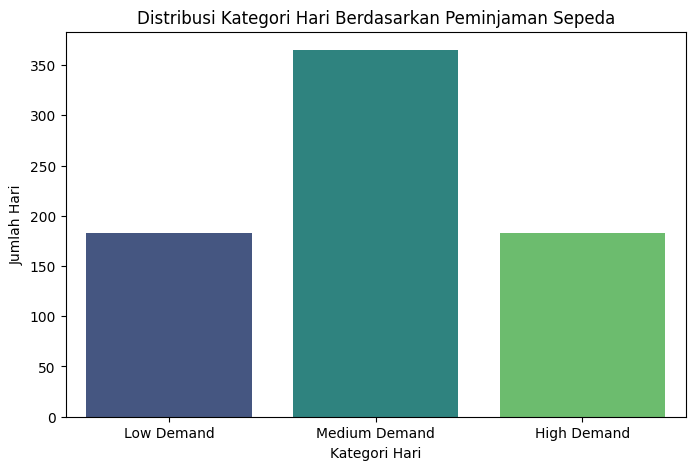

In [122]:
# Plot untuk distribusi kategori hari (Low, Medium, High Demand)
plt.figure(figsize=(8, 5))
sns.countplot(x=df_day['demand_category'], hue=df_day['demand_category'], palette='viridis', order=['Low Demand', 'Medium Demand', 'High Demand'], legend=False)
plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Hari')
plt.title('Distribusi Kategori Hari Berdasarkan Peminjaman Sepeda')
plt.show()

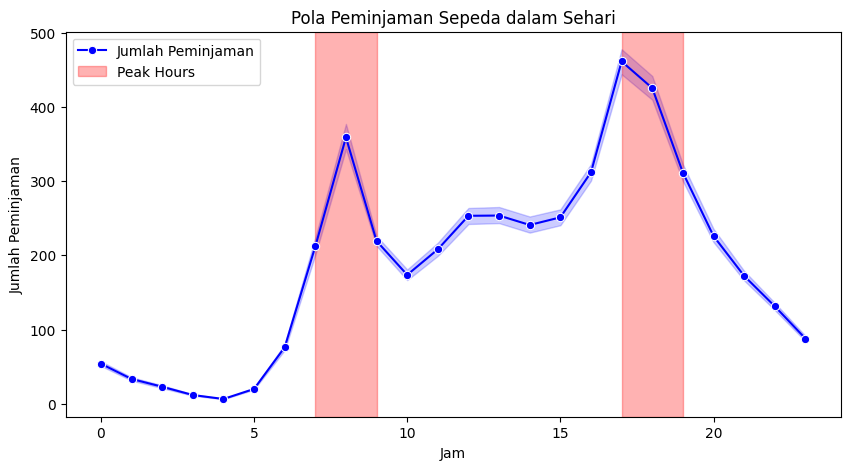

In [123]:
# Plot untuk distribusi kategori jam (Peak vs Non-Peak Hours)
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_hour['hr'], y=df_hour['cnt'], marker='o', label='Jumlah Peminjaman', color='blue')
plt.axvspan(7, 9, color='red', alpha=0.3, label='Peak Hours')  # Morning peak
plt.axvspan(17, 19, color='red', alpha=0.3)  # Evening peak
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.title('Pola Peminjaman Sepeda dalam Sehari')
plt.legend()
plt.show()

### Kesimpulan

Hasil Analisis Clustering pada Jumlah Peminjaman Sepeda
Setelah melakukan clustering berdasarkan jumlah peminjaman sepeda (cnt), kita dapat mengelompokkan data menjadi tiga kategori:

> Low Demand (Permintaan Rendah)

- Rentang peminjaman: 0 - sekitar 2500 peminjaman
- Biasanya terjadi pada musim dingin atau cuaca buruk (hujan lebat dan salju ringan).
- Hari libur dan akhir pekan sering termasuk dalam kategori ini.

>Medium Demand (Permintaan Sedang)

- Rentang peminjaman: 2500 - sekitar 5000 peminjaman
- Terjadi saat kondisi cuaca lebih baik (cerah atau sedikit berkabut).
- Banyak terjadi pada hari kerja, terutama di luar jam sibuk.

> High Demand (Permintaan Tinggi)

- Rentang peminjaman: 5000+ peminjaman
- Terjadi pada musim panas dan gugur, saat cuaca lebih mendukung aktivitas luar ruangan.
- Puncaknya terjadi pada jam sibuk (pagi dan sore hari) ketika orang menggunakan sepeda untuk bepergian ke tempat kerja atau sekolah.


### Insight dari Clustering

- Cuaca dan Musim Berpengaruh → Pada musim dingin dan cuaca buruk, jumlah peminjaman sepeda menurun drastis.
- Hari Kerja vs Akhir Pekan → Hari kerja memiliki lebih banyak peminjaman dibanding akhir pekan, tetapi akhir pekan cenderung memiliki lebih banyak peminjaman rekreasional.
- Pola Harian yang Kuat → Terdapat dua puncak dalam peminjaman sepeda, yaitu di pagi hari dan sore hari, menunjukkan bahwa sepeda sering digunakan untuk perjalanan kerja/sekolah.